<a href="https://colab.research.google.com/github/yerko33/AluraStore_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [5]:
total_Tienda1 = sum(tienda["Precio"])
total_Tienda2 = sum(tienda2["Precio"])
total_Tienda3 = sum(tienda3["Precio"])
total_Tienda4 = sum(tienda4["Precio"])

entero = int(total_Tienda1)
entero2 = int(total_Tienda2)
entero3 = int(total_Tienda3)
entero4 = int(total_Tienda4)

formateado = f"{entero:,}".replace(",", ".")
formateado2 = f"{entero2:,}".replace(",", ".")
formateado3 = f"{entero3:,}".replace(",", ".")
formateado4 = f"{entero4:,}".replace(",", ".")

print(f"el total de la tienda 1 es: {formateado}")
print(f"el total de la tienda 2 es: {formateado2}")
print(f"el total de la tienda 3 es: {formateado3}")
print(f"el total de la tienda 4 es: {formateado4}")


el total de la tienda 1 es: 1.150.880.400
el total de la tienda 2 es: 1.116.343.500
el total de la tienda 3 es: 1.098.019.600
el total de la tienda 4 es: 1.038.375.700


# 1.1 Grafico Analisis de Facturación

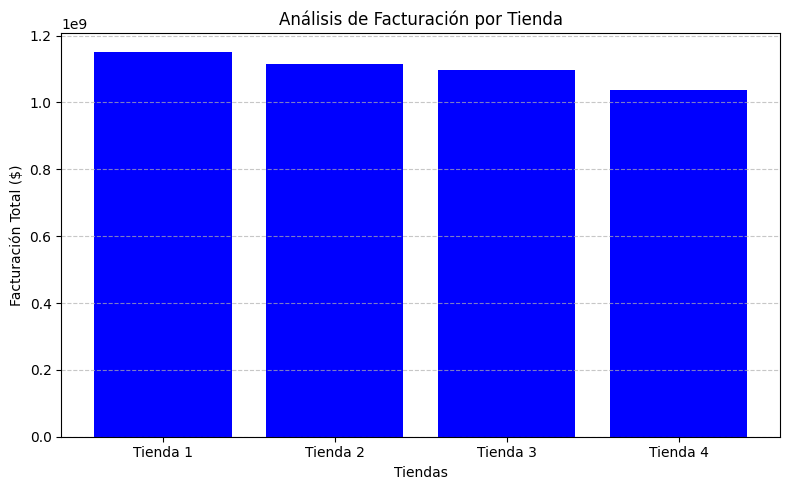

In [6]:
import matplotlib.pyplot as plt

# Crear listas para el gráfico
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion_total = [total_Tienda1, total_Tienda2, total_Tienda3, total_Tienda4]

# Crear gráfico de barras
plt.figure(figsize=(8, 5)) #tamaño del grafico en pulgadas
plt.bar(nombres_tiendas, facturacion_total, color='blue')# (etiquetas del eje X, valores que representa cada barra, color de las barras
plt.title("Análisis de Facturación por Tienda") #Titulo del grafico
plt.xlabel("Tiendas") #etiqueta del eje X
plt.ylabel("Facturación Total ($)") #etiqueta eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7) #agrega lineas guia
plt.tight_layout() # ajusta el espaciado del grafico
plt.show() #muestra el grafico en pantalla

# 2. Ventas por categoría

In [7]:
# esta funcion cuenta cuantas veces aparece cada categoria de producto
def contar_por_categoria(tienda_1):
    conteo = {}
    try:
        #se almacena en una variable el contenido de la columna Categoria de producto
        categorias = tienda_1["Categoría del Producto"]
        #con un ciclo for se recorre la lista
        for categoria in categorias:
            #se guarda en el diccionario conteo cada categoria
            if categoria in conteo:
                conteo[categoria] += 1
            else:
                conteo[categoria] = 1
    except KeyError as e:
        print("Columna no encontrada:", e)
    return conteo

categorias_tienda1 = contar_por_categoria(tienda)
categorias_tienda2 = contar_por_categoria(tienda2)
categorias_tienda3 = contar_por_categoria(tienda3)
categorias_tienda4 = contar_por_categoria(tienda4)

#Ordeno el diccionario resultado de mayor a menor y selecciona las 3 categorias mas populares
top3_tienda1 = sorted(categorias_tienda1.items(), key=lambda x: x[1], reverse=True)[:3]
top3_tienda2 = sorted(categorias_tienda2.items(), key=lambda x: x[1], reverse=True)[:3]
top3_tienda3 = sorted(categorias_tienda3.items(), key=lambda x: x[1], reverse=True)[:3]
top3_tienda4 = sorted(categorias_tienda4.items(), key=lambda x: x[1], reverse=True)[:3]

#Se imprimen las 3 categorias con mas ventas
print("\nTop 3 categorías más populares en la tienda 1:")
for categoria, cantidad in top3_tienda1:
    print(f"- {categoria}: {cantidad} ventas")

print("\nTop 3 categorías más populares en la tienda 2:")
for categoria, cantidad in top3_tienda2:
    print(f"- {categoria}: {cantidad} ventas")

print("\nTop 3 categorías más populares en la tienda 3:")
for categoria, cantidad in top3_tienda3:
    print(f"- {categoria}: {cantidad} ventas")

print("\nTop 3 categorías más populares en la tienda 4:")
for categoria, cantidad in top3_tienda4:
    print(f"- {categoria}: {cantidad} ventas")


Top 3 categorías más populares en la tienda 1:
- Muebles: 465 ventas
- Electrónicos: 448 ventas
- Juguetes: 324 ventas

Top 3 categorías más populares en la tienda 2:
- Muebles: 442 ventas
- Electrónicos: 422 ventas
- Juguetes: 313 ventas

Top 3 categorías más populares en la tienda 3:
- Muebles: 499 ventas
- Electrónicos: 451 ventas
- Juguetes: 315 ventas

Top 3 categorías más populares en la tienda 4:
- Muebles: 480 ventas
- Electrónicos: 451 ventas
- Juguetes: 338 ventas


# 2.1 Grafico ventas por categoria

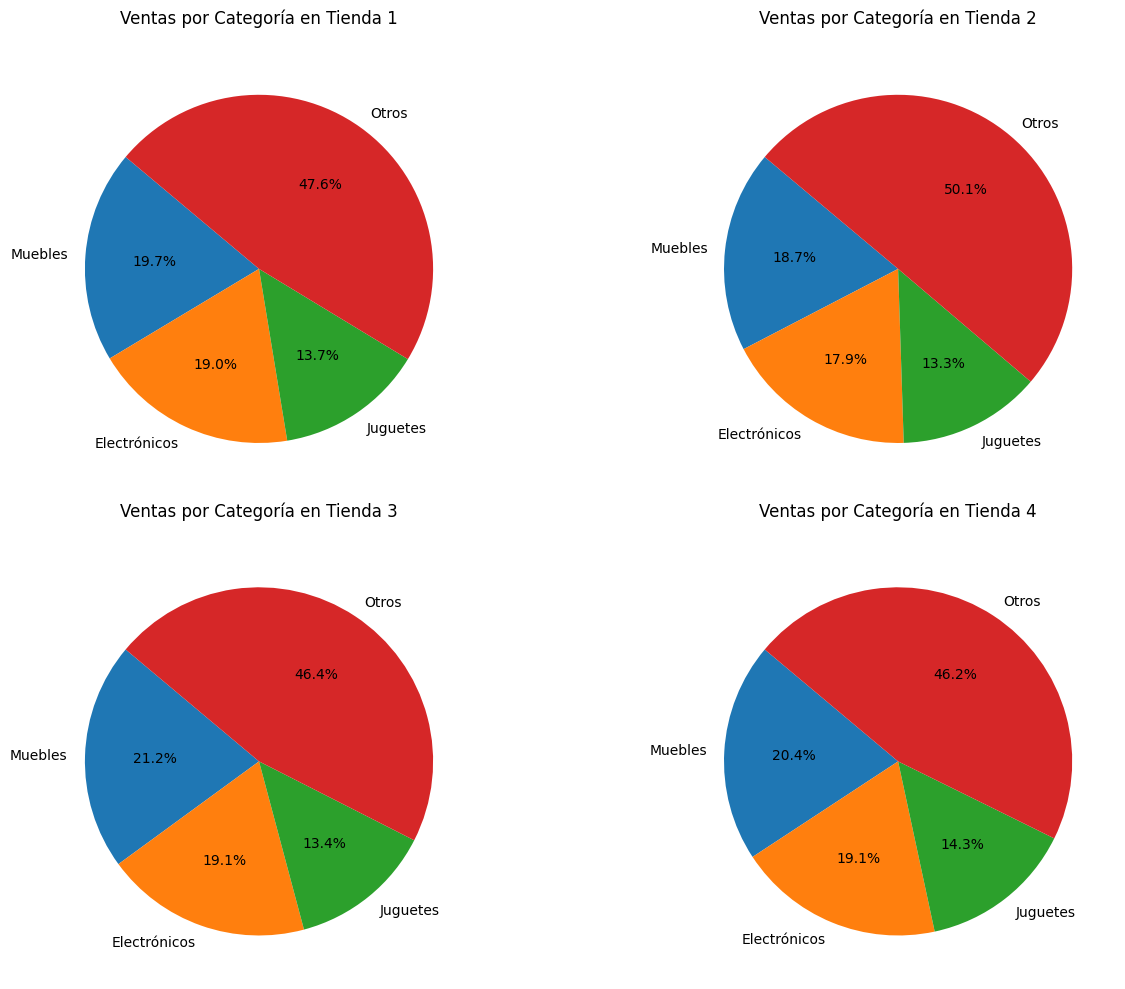

In [21]:
import matplotlib.pyplot as plt

# Diccionario de productos y ventas por tienda
dic_Tienda1 = categorias_tienda1
dic_Tienda2 = categorias_tienda2
dic_Tienda3 = categorias_tienda3
dic_Tienda4 = categorias_tienda4

# Lista de las tiendas
tiendas = [dic_Tienda1, dic_Tienda2, dic_Tienda3, dic_Tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear gráfico de torta para cada tienda
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Crear grid 2x2
axs = axs.flatten()  # Aplanar para recorrer más fácilmente

for i, tienda_categoria in enumerate(tiendas):
    # Ordenar productos por ventas en orden descendente
    productos_ordenados = sorted(tienda_categoria.items(), key=lambda x: x[1], reverse=True)

    # Obtener los 3 productos más vendidos
    productos_top3 = productos_ordenados[:3]
    ventas_top3 = [venta for _, venta in productos_top3]
    productos_top3_nombres = [producto for producto, _ in productos_top3]

    # Calcular el total de ventas de la tienda
    total_ventas = sum(tienda_categoria.values())

    # Calcular la categoría "Otros" sumando las ventas de los productos restantes
    ventas_otros = total_ventas - sum(ventas_top3)

    # Agregar la categoría "Otros"
    productos_top3_nombres.append('Otros')
    ventas_top3.append(ventas_otros)

    # Crear gráfico de torta en el subplot correspondiente
    axs[i].pie(ventas_top3, labels=productos_top3_nombres, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f"Ventas por Categoría en {nombres_tiendas[i]}", pad=20)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [9]:
#Calculo de promedio de satisfaccion tienda 1
promedio_tienda = round(tienda["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 1 es {promedio_tienda}")

#Calculo de promedio de satisfaccion tienda 2
promedio_tienda2 = round(tienda2["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 2 es {promedio_tienda2}")

#Calculo de promedio de satisfaccion tienda 3
promedio_tienda3 = round(tienda3["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 3 es {promedio_tienda3}")

#Calculo de promedio de satisfaccion tienda 4
promedio_tienda4 = round(tienda4["Calificación"].mean(), 2)
print(f"- La calificacion promedio de la tienda 4 es {promedio_tienda4}")


- La calificacion promedio de la tienda 1 es 3.98
- La calificacion promedio de la tienda 2 es 4.04
- La calificacion promedio de la tienda 3 es 4.05
- La calificacion promedio de la tienda 4 es 4.0


# 3.1 Grafico calificacion promedio

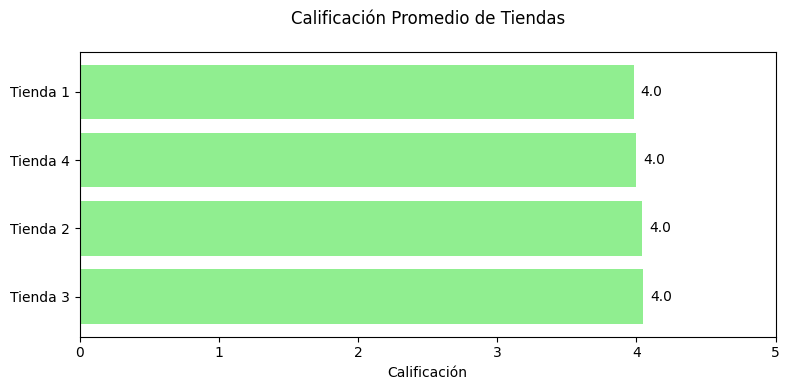

In [10]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios_calificacion = [promedio_tienda, promedio_tienda2, promedio_tienda3, promedio_tienda4]

# Ordenar de mayor a menor
calificaciones_ordenadas, tiendas_ordenadas = zip(*sorted(zip(promedios_calificacion, tiendas), reverse=True))

plt.figure(figsize=(8, 4))
bars = plt.barh(tiendas_ordenadas, calificaciones_ordenadas, color='lightcoral')

# Mostrar valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va='center', fontsize=10)

plt.barh(tiendas_ordenadas, calificaciones_ordenadas, color='lightgreen')
plt.title("Calificación Promedio de Tiendas", pad=20)
plt.xlabel("Calificación")
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [11]:
# esta funcion cuenta cuantas veces aparece cada producto
def contar_por_producto(tienda_1):
    conteo = {}
    try:
        #se almacena en una variable el contenido de la columna Producto
        productos = tienda_1["Producto"]
        #con un ciclo for se recorre la lista
        for producto in productos:
            #se guarda en el diccionario conteo cada producto
            if producto in conteo:
                conteo[producto] += 1
            else:
                conteo[producto] = 1
    except KeyError as e:
        print("Columna no encontrada:", e)
    return conteo

productos_tienda1 = contar_por_producto(tienda)
productos_tienda2 = contar_por_producto(tienda2)
productos_tienda3 = contar_por_producto(tienda3)
productos_tienda4 = contar_por_producto(tienda4)


# Obtener los 5 productos más vendidos tienda 1
productos_mas_vendidos = sorted(productos_tienda1.items(), key=lambda x: x[1], reverse=True)[:5]
print("Los 5 productos más vendidos de la tienda 1:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 1
productos_menos_vendidos = sorted(productos_tienda1.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 1:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos más vendidos tienda 2
productos_mas_vendidos = sorted(productos_tienda2.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nLos 5 productos más vendidos de la tienda 2:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 2
productos_menos_vendidos = sorted(productos_tienda2.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 2:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos más vendidos tienda 3
productos_mas_vendidos = sorted(productos_tienda3.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nLos 5 productos más vendidos de la tienda 3:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 3
productos_menos_vendidos = sorted(productos_tienda3.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 3:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos más vendidos tienda 4
productos_mas_vendidos = sorted(productos_tienda4.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nLos 5 productos más vendidos de la tienda 4:")
for producto, cantidad in productos_mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

# Obtener los 5 productos menos vendidos tienda 4
productos_menos_vendidos = sorted(productos_tienda4.items(), key=lambda x: x[1])[:5]
print("\nLos 5 productos menos vendidos de la tienda 4:")
for producto, cantidad in productos_menos_vendidos:
    print(f"{producto}: {cantidad} ventas")

Los 5 productos más vendidos de la tienda 1:
Microondas: 60 ventas
TV LED UHD 4K: 60 ventas
Armario: 60 ventas
Secadora de ropa: 58 ventas
Bloques de construcción: 56 ventas

Los 5 productos menos vendidos de la tienda 1:
Auriculares con micrófono: 33 ventas
Celular ABXY: 33 ventas
Olla de presión: 35 ventas
Pandereta: 36 ventas
Ciencia de datos con Python: 39 ventas

Los 5 productos más vendidos de la tienda 2:
Iniciando en programación: 65 ventas
Microondas: 62 ventas
Batería: 61 ventas
Pandereta: 58 ventas
Guitarra acústica: 58 ventas

Los 5 productos menos vendidos de la tienda 2:
Juego de mesa: 32 ventas
Mesa de comedor: 34 ventas
Impresora: 34 ventas
Sillón: 35 ventas
Auriculares: 37 ventas

Los 5 productos más vendidos de la tienda 3:
Kit de bancas: 57 ventas
Mesa de comedor: 56 ventas
Cama king: 56 ventas
Mesa de noche: 55 ventas
Set de ollas: 55 ventas

Los 5 productos menos vendidos de la tienda 3:
Bloques de construcción: 35 ventas
Set de vasos: 36 ventas
Mochila: 36 ventas


# 4.1 Grafico mas y menos vendidos

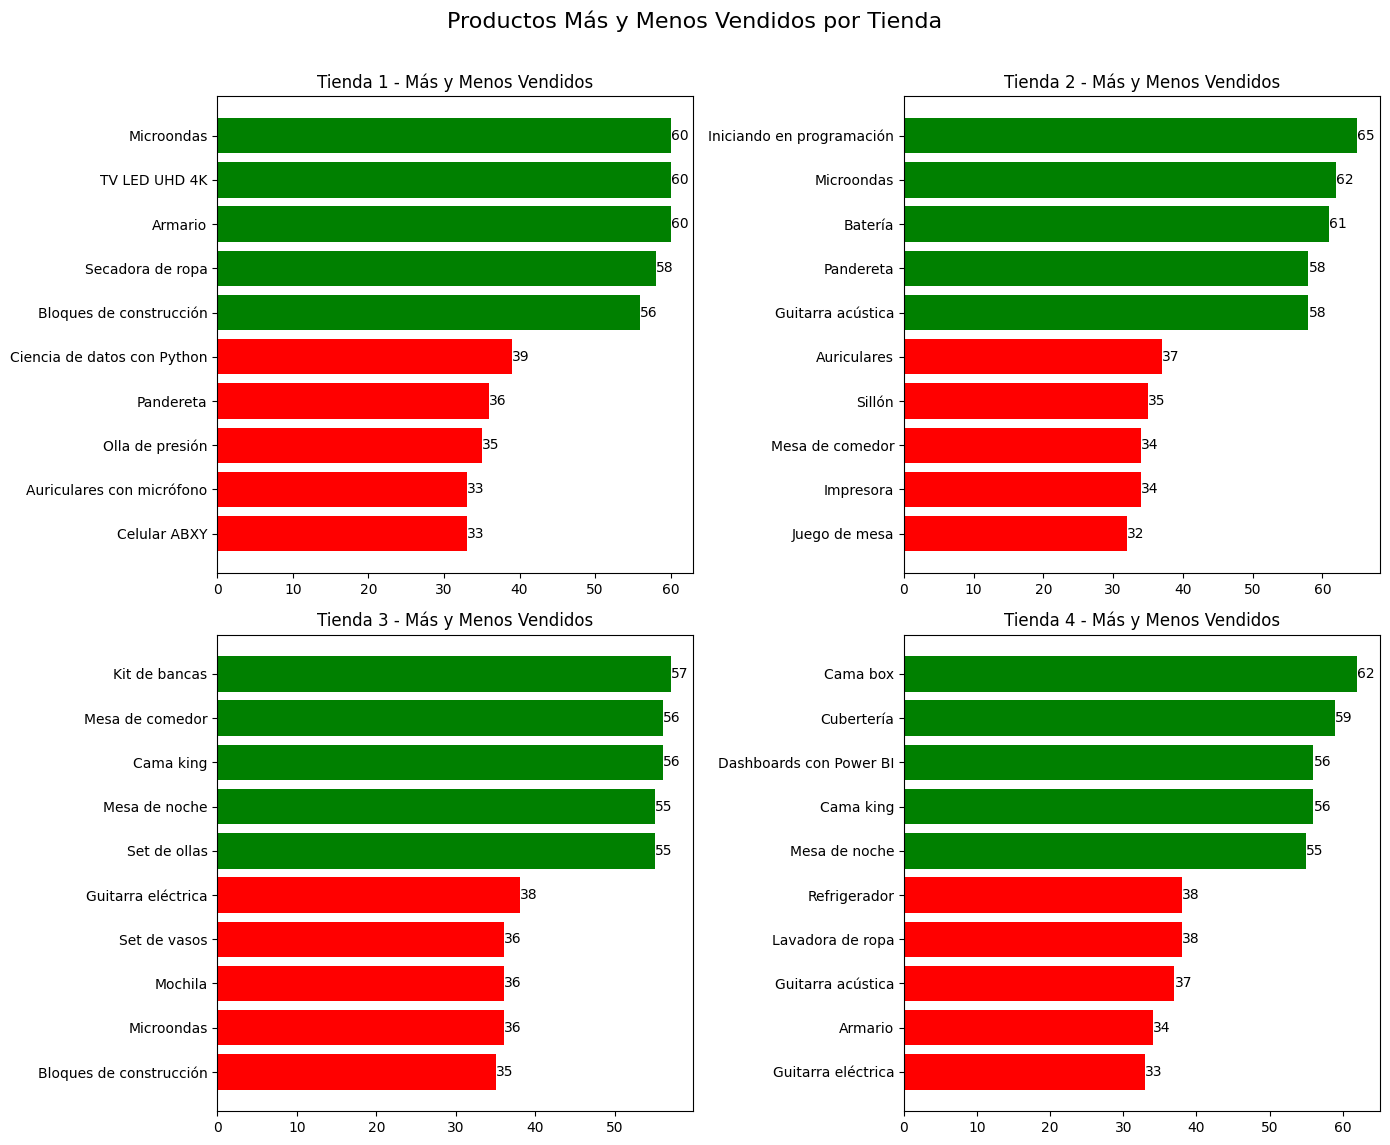

In [27]:
# Datos de productos más y menos vendidos para cada tienda
productos_mas_vendidos_listas = [
    sorted(productos_tienda1.items(), key=lambda x: x[1], reverse=True)[:5],
    sorted(productos_tienda2.items(), key=lambda x: x[1], reverse=True)[:5],
    sorted(productos_tienda3.items(), key=lambda x: x[1], reverse=True)[:5],
    sorted(productos_tienda4.items(), key=lambda x: x[1], reverse=True)[:5]
]

productos_menos_vendidos_listas = [
    sorted(productos_tienda1.items(), key=lambda x: x[1])[:5],
    sorted(productos_tienda2.items(), key=lambda x: x[1])[:5],
    sorted(productos_tienda3.items(), key=lambda x: x[1])[:5],
    sorted(productos_tienda4.items(), key=lambda x: x[1])[:5]
]

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear una figura con una cuadrícula 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))  # 2 filas y 2 columnas
fig.suptitle("Productos Más y Menos Vendidos por Tienda", fontsize=16)  # Título general

# Recorrer cada tienda y generar los gráficos combinados
for i in range(4):
    # Más vendidos
    productos_mas = sorted(productos_mas_vendidos_listas[i], key=lambda x: x[1], reverse=True)
    nombres_mas = [p[0] for p in productos_mas]
    cantidades_mas = [p[1] for p in productos_mas]

    # Menos vendidos (orden descendente)
    productos_menos = sorted(productos_menos_vendidos_listas[i], key=lambda x: x[1], reverse=True)  # Corregido
    nombres_menos = [p[0] for p in productos_menos]
    cantidades_menos = [p[1] for p in productos_menos]

    # Dibujar ambos gráficos en el mismo gráfico de barras (más vendidos + menos vendidos)
    axes[i//2, i%2].barh(nombres_mas, cantidades_mas, color='green', label='Más Vendidos')  # Más vendidos
    axes[i//2, i%2].barh(nombres_menos, cantidades_menos, color='red', label='Menos Vendidos')  # Menos vendidos

    # Invertir el eje Y para que los productos más vendidos estén arriba
    axes[i//2, i%2].invert_yaxis()
    axes[i//2, i%2].set_title(f"{nombres_tiendas[i]} - Más y Menos Vendidos")  # Título para el gráfico

    # Agregar cantidades como texto en las barras
    for j, valor in enumerate(cantidades_mas):
        axes[i//2, i%2].text(valor, j, str(valor), va='center', ha='left')

    for j, valor in enumerate(cantidades_menos):
        axes[i//2, i%2].text(valor, j + len(cantidades_mas), str(valor), va='center', ha='left')

# Ajustar el layout para que no se sobrepongan los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Deja espacio para el título
plt.show()

# 5. Envío promedio por tienda

In [13]:
#Calculo de promedio de costo de envio tienda 1
promedio_tienda1 = tienda["Costo de envío"].mean()
formateado1 = f"{int(round(promedio_tienda1)):,}".replace(",", ".")
print(f"- El costo de envío promedio de la tienda 1 es {formateado1}")

#Calculo de promedio de costo de envio tienda 2
promedio_tienda2 = tienda2["Costo de envío"].mean()
formateado2 = f"{int(round(promedio_tienda2)):,}".replace(",", ".")
print(f"- El costo de envío promedio de la tienda 2 es {formateado2}")

#Calculo de promedio de costo de envio tienda 3
promedio_tienda3 = tienda3["Costo de envío"].mean()
formateado3 = f"{int(round(promedio_tienda3)):,}".replace(",", ".")
print(f"- El costo de envío promedio de la tienda 3 es {formateado3}")

#Calculo de promedio de costo de envio tienda 4
promedio_tienda4 = tienda4["Costo de envío"].mean()
formateado4 = f"{int(round(promedio_tienda4)):,}".replace(",", ".")
print(f"- El costo de envío promedio de la tienda 4 es {formateado4}")

- El costo de envío promedio de la tienda 1 es 26.019
- El costo de envío promedio de la tienda 2 es 25.216
- El costo de envío promedio de la tienda 3 es 24.806
- El costo de envío promedio de la tienda 4 es 23.459


# 5.1 Grafico envio promedio

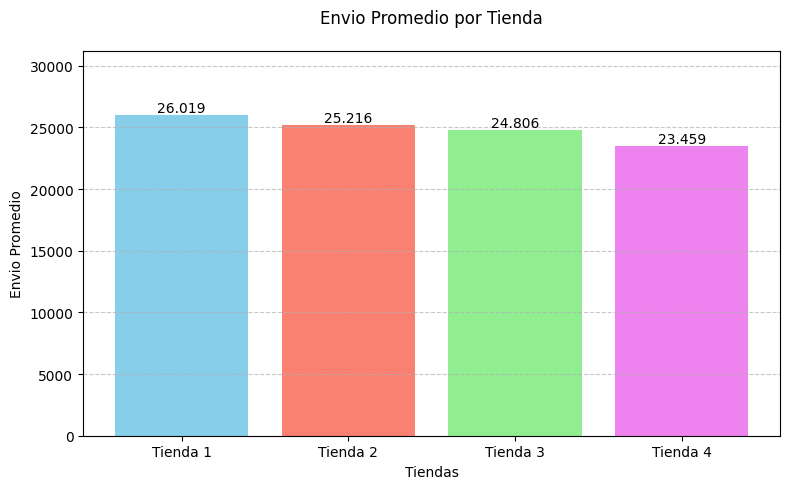

In [14]:
# Lista de nombres de tiendas y sus promedios
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios_envio = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

plt.figure(figsize=(8, 5))
bars = plt.bar(nombres_tiendas, promedios_envio, color=['skyblue', 'salmon', 'lightgreen', 'violet'])

plt.title("Envio Promedio por Tienda", pad=20)
plt.xlabel("Tiendas")
plt.ylabel("Envio Promedio")
limite_superior = max(promedios_envio) * 1.2  # Aumenta el 20% del valor más alto
plt.ylim(0, limite_superior)  # Ajusta según el máximo de calificación posible
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor sobre cada barra
for bar in bars:
    yval = bar.get_height()
    texto_formateado = f"{int(round(yval)):,}".replace(",", ".")
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, texto_formateado, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Ventas totales por Año

In [15]:
from datetime import datetime
from collections import defaultdict

def contar_ventas_por_año(tienda_1):
  # Asegurarte de que la columna sea tipo datetime
  tienda_1['Fecha de Compra'] = pd.to_datetime(tienda_1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
  # Extraer el año en una nueva columna
  tienda_1['Año'] = tienda_1['Fecha de Compra'].dt.year
  # Agrupar por año y contar cuántas ventas hay en cada uno
  ventas_por_año = tienda_1.groupby('Año').size()

  return ventas_por_año

ventas_por_año_tienda1 = contar_ventas_por_año(tienda)
ventas_por_año_tienda2 = contar_ventas_por_año(tienda2)
ventas_por_año_tienda3 = contar_ventas_por_año(tienda3)
ventas_por_año_tienda4 = contar_ventas_por_año(tienda4)


print(f'Ventas por Año de la tienda 1: {ventas_por_año_tienda1}')
print(f'Ventas por Año de la tienda 2: {ventas_por_año_tienda2}')
print(f'Ventas por Año de la tienda 3: {ventas_por_año_tienda3}')
print(f'Ventas por Año de la tienda 4: {ventas_por_año_tienda4}')

Ventas por Año de la tienda 1: Año
2020    715
2021    739
2022    713
2023    192
dtype: int64
Ventas por Año de la tienda 2: Año
2020    700
2021    759
2022    708
2023    192
dtype: int64
Ventas por Año de la tienda 3: Año
2020    701
2021    740
2022    740
2023    178
dtype: int64
Ventas por Año de la tienda 4: Año
2020    745
2021    744
2022    712
2023    157
dtype: int64


# 6.1 Grafico ventas totales por año

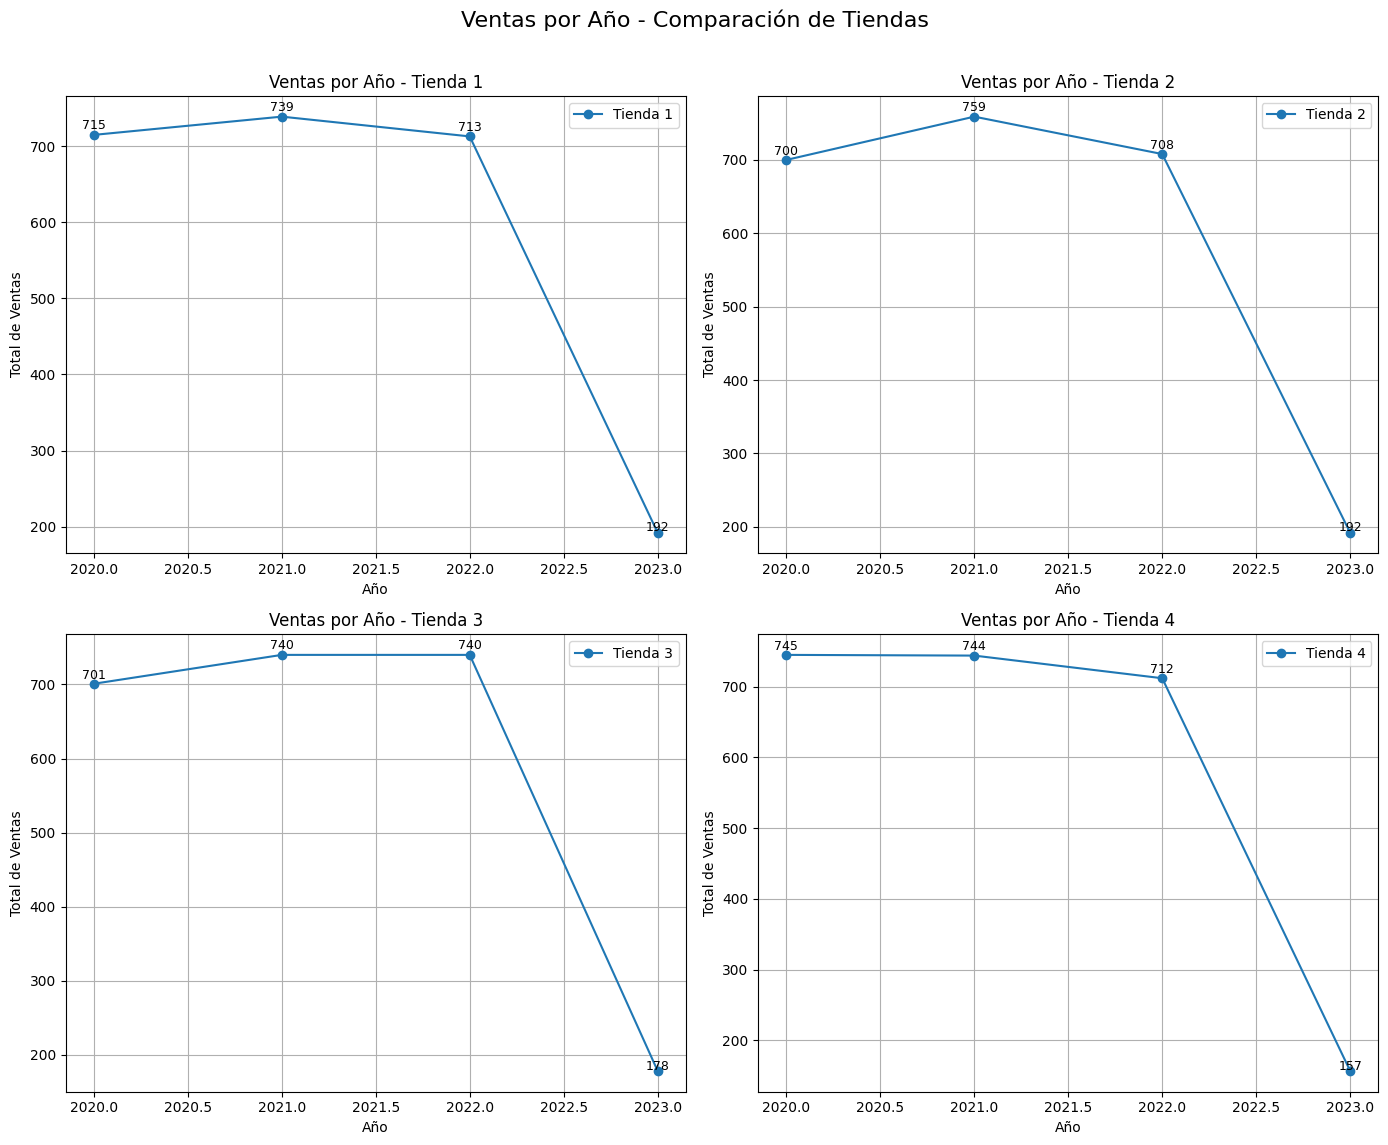

In [28]:
# Función para graficar las ventas por año de una tienda
def graficar_ventas_por_año(ventas_por_año, nombre_tienda, ax):
    ax.plot(ventas_por_año.index, ventas_por_año.values, marker='o', linestyle='-', label=nombre_tienda)
    ax.set_title(f'Ventas por Año - {nombre_tienda}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Total de Ventas')
    ax.grid(True)
    ax.legend()

    # Mostrar los valores sobre cada punto
    for x, y in zip(ventas_por_año.index, ventas_por_año.values):
        valor_formateado = f"{int(y):,}".replace(",", ".")
        ax.text(x, y + y * 0.01, valor_formateado, ha='center', fontsize=9)

# Crear una cuadrícula de 2x2 para los subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 filas y 2 columnas

# Llamar a la función para cada tienda y asignar cada gráfico a una posición de la cuadrícula
graficar_ventas_por_año(ventas_por_año_tienda1, 'Tienda 1', axes[0, 0])
graficar_ventas_por_año(ventas_por_año_tienda2, 'Tienda 2', axes[0, 1])
graficar_ventas_por_año(ventas_por_año_tienda3, 'Tienda 3', axes[1, 0])
graficar_ventas_por_año(ventas_por_año_tienda4, 'Tienda 4', axes[1, 1])

# Ajustar el layout para que no se sobrepongan los gráficos y se vea bien el título general
fig.suptitle('Ventas por Año - Comparación de Tiendas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Ajusta el espacio para el título

# Mostrar el gráfico
plt.show()


# 7. Facturacion total por Año

In [17]:
def calcular_facturacion_por_año(tienda_1):
    # Asegurar que la columna de fecha está en formato datetime
    tienda_1['Fecha de Compra'] = pd.to_datetime(tienda_1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

    # Extraer el año
    tienda_1['Año'] = tienda_1['Fecha de Compra'].dt.year

    # Agrupar por año y sumar la columna "Precio"
    facturacion_anual = tienda_1.groupby('Año')['Precio'].sum()

    # Imprimir resultados con separador de miles
    print("Total facturado por año:")
    for año, total in facturacion_anual.items():
        total_formateado = f"{int(round(total)):,}".replace(",", ".")
        print(f"Año {año}: ${total_formateado}")

    return facturacion_anual

facturacion_tienda1 = calcular_facturacion_por_año(tienda)
facturacion_tienda2 = calcular_facturacion_por_año(tienda2)
facturacion_tienda3 = calcular_facturacion_por_año(tienda3)
facturacion_tienda4 = calcular_facturacion_por_año(tienda4)

Total facturado por año:
Año 2020: $368.933.200
Año 2021: $362.120.800
Año 2022: $316.565.600
Año 2023: $103.260.800
Total facturado por año:
Año 2020: $320.466.600
Año 2021: $351.215.500
Año 2022: $358.226.500
Año 2023: $86.434.900
Total facturado por año:
Año 2020: $321.707.500
Año 2021: $362.954.400
Año 2022: $350.438.300
Año 2023: $62.919.400
Total facturado por año:
Año 2020: $330.847.700
Año 2021: $347.823.600
Año 2022: $302.221.500
Año 2023: $57.482.900


# 7.1 Grafico facturación total por año

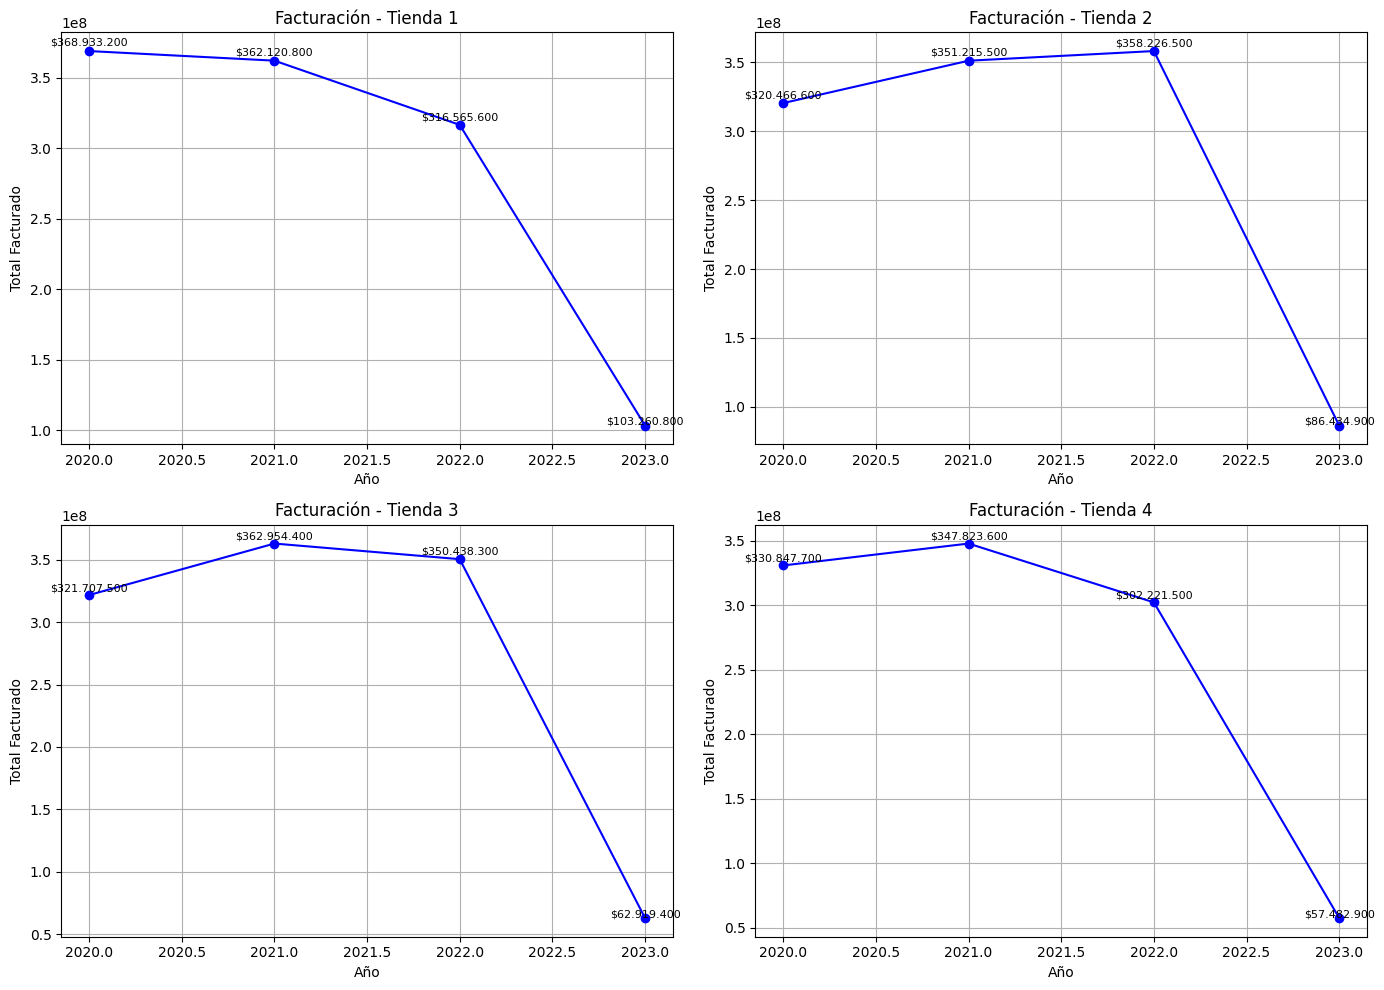

In [20]:
def graficar_todas_las_facturaciones(facturaciones, nombres_tiendas):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Crear grid 2x2
    axs = axs.flatten()  # Aplanar para recorrer más fácilmente

    for i in range(4):
        datos = facturaciones[i]
        nombre = nombres_tiendas[i]
        ax = axs[i]

        ax.plot(datos.index, datos.values, marker='o', linestyle='-', color='blue')
        ax.set_title(f"Facturación - {nombre}")
        ax.set_xlabel("Año")
        ax.set_ylabel("Total Facturado")
        ax.grid(True)

        # Mostrar valores
        for x, y in zip(datos.index, datos.values):
            valor_formateado = f"${int(round(y)):,}".replace(",", ".")
            ax.text(x, y + y * 0.01, valor_formateado, ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()

# Llamar la función con los datos
graficar_todas_las_facturaciones(
    [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4],
    ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
)


# 8. Informe Final

El objetivo de este analisis es poder ayudar al Señor Juan a identificar cual de sus tiendas presenta la menor eficiencia y por lo tanto, es la candidata para ser vendida. Para esto tomaremos en consideración diversos factores clave de rendimiento, como ingresos totales de cada tienda, calificación de los clientes, categoria de productos mas vendidos, cantidad de ventas anuales, productos mas y menos vendidos, costos de envio y facturación total a lo largo de los años.

1. Analisis de tiendas:

Tienda 1:

- Facturación total: $1.150.880.400

- Ventas Anuales (2023): 192 ventas, una caída del 73% comparado con 2020.

- Categorías más populares: Muebles, Electrónicos, Juguetes.

- Calificación Promedio: 3.98 (baja en comparación con otras tiendas).

- Coste de Envío Promedio: $26.019 (relativamente alto).

Fortalezas:

- Es la tienda con la facturación mas alta.
- Sus categorias mas populares son Muebles y Electrónicos.

Debilidades:

- Caída significativa en ventas en 2023, lo que refleja una pérdida de demanda.
- Calificación promedio baja (3.98), lo que podría indicar una experiencia de cliente no óptima.
- Alto costo de envío, lo que afecta la rentabilidad.

Tienda 2:

- Ingresos Totales: $1.116.343.500

- Ventas Anuales (2023): 192 ventas, caída del 73% respecto a 2020.

- Categorías más populares: Muebles, Electrónicos, Juguetes.

- Calificación Promedio: 4.04 (buena).

- Coste de Envío Promedio: $25.216.

Fortalezas:

- Tiene una buena calificación por parte de los clientes, lo que indica un buen servicio.
- Ingresos relativamente altos.

Debilidades:

- Caída en ventas en 2023, al igual que en la Tienda 1, lo que sugiere una disminución en la demanda.

- Coste de envío moderadamente alto, aunque algo menor que el de la Tienda 1.

Tienda 3:

- Ingresos Totales: $1.098.019.600

- Ventas Anuales (2023): 178 ventas, caída del 75% respecto a 2020.

- Categorías más populares: Muebles, Electrónicos.

- Calificación Promedio: 4.05 (la más alta entre las tiendas).

- Coste de Envío Promedio: $24.806 (más bajo entre las tiendas).

Fortalezas:

- La calificación promedio de 4.05 es la mejor entre todas las tiendas, indicando alta satisfacción del cliente.

- El coste de envío es el más bajo, lo que mejora la rentabilidad.

Debilidades:

- A pesar de tener una calificación excelente, sus ingresos totales son más bajos que los de las otras tiendas.

- Al igual que las demás, presenta una caída en ventas en 2023.

Tienda 4:

- Ingresos Totales: $1.038.375.700

- Ventas Anuales (2023): 157 ventas, caída del 83% respecto a 2020.

- Categorías más populares: Muebles, Electrónicos.

- Calificación Promedio: 4.0 (adecuada).

- Coste de Envío Promedio: $23.459 (el más bajo entre todas las tiendas).

Fortalezas:

- El coste de envío es el más bajo, lo que puede generar una mayor eficiencia operativa.

- A pesar de los bajos ingresos, la tienda tiene un desempeño aceptable en las categorías populares.

Debilidades:

- La caída en ventas en 2023 es la más drástica (83%), lo que sugiere una pérdida de clientes significativa.

- Ingresos totales más bajos que los de las otras tiendas, lo que indica una falta de eficiencia en términos de ventas.

- Aunque la calificación es aceptable (4.0), no es tan alta como la de la Tienda 3.

2. Comparativa de datos

Caída en Ventas (2023):

Tienda 1: Caída del 73% en ventas.

Tienda 2: Caída del 73% en ventas.

Tienda 3: Caída del 75% en ventas.

Tienda 4: Caída del 83% en ventas (la más grande).

Ingresos Totales:

Tienda 1: $1.150.880.400 (mayores ingresos).

Tienda 2: $1.116.343.500.

Tienda 3: $1.098.019.600.

Tienda 4: $1.038.375.700 (menores ingresos).

Calificación Promedio:

Tienda 1: 3.98 (baja).

Tienda 2: 4.04 (buena).

Tienda 3: 4.05 (mejor calificación).

Tienda 4: 4.0 (adecuada).

Coste de Envío Promedio:

Tienda 1: $26.019 (alto).

Tienda 2: $25.216 (moderado).

Tienda 3: $24.806 (bajo).

Tienda 4: $23.459 (más bajo).

3. Decisión:

Tienda 4 debe ser la tienda a vender, ya que presenta las siguientes desventajas clave:

- Mayor Caída en Ventas: La caída de ventas más pronunciada (83%) en 2023 sugiere una pérdida significativa de clientes o una demanda insostenible.

- Menor Ingreso Total: A pesar de tener el coste de envío más bajo, sus ingresos totales son los más bajos entre las tiendas, lo que refleja una baja eficiencia operativa.

- Desempeño Global Inferior: Aunque tiene una calificación promedio aceptable y menores costos de envío, estos factores no son suficientes para contrarrestar la drástica caída en ventas y los ingresos más bajos.

Recomendación: La Tienda 4 es la opción menos eficiente y debería ser considerada para su venta o cierre. Los recursos pueden ser mejor invertidos en las otras tiendas que tienen un desempeño más consistente y favorable.



